# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/lena.png')

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

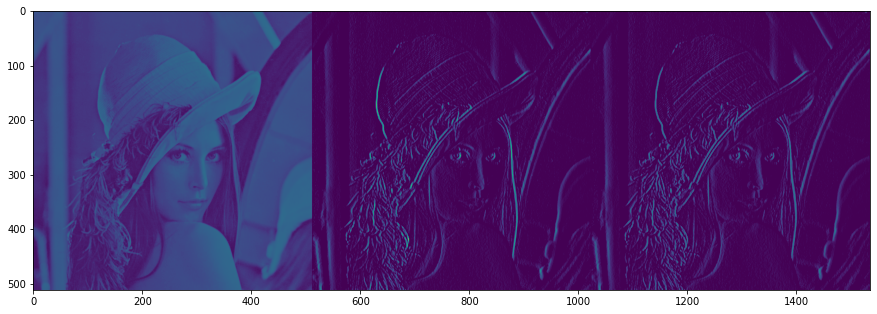

In [13]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S , dx = 1 , dy = 0 , ksize = 3)# 對X微分

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16U , dx = 1 , dy = 0 , ksize =3 )

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U , dx = 1 , dy = 0 , ksize = 3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
plt.figure(figsize=(15,45))
plt.imshow(img_show)
plt.show()

### 比較一次與兩次計算偏微分的結果

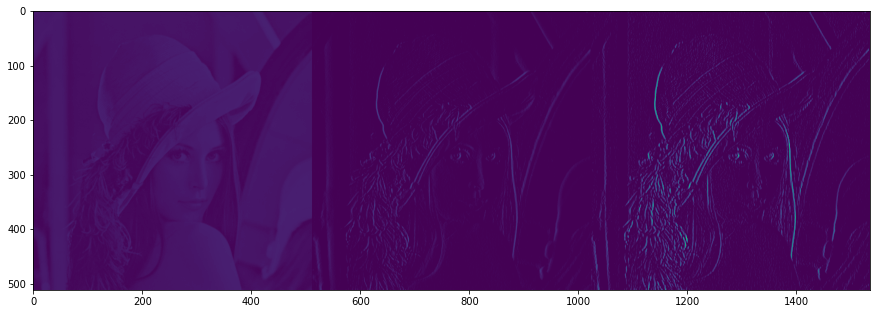

In [16]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey , cv2.CV_16U , dx = 1, dy = 0 , ksize = 3)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_sobel_x , cv2.CV_16U , dx = 1, dy = 0 , ksize = 3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
plt.figure(figsize=(15,45))
plt.imshow(img_show)
plt.show()